In [1]:
%load_ext ipython_unittest
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append('..')
sys.path.append('../smallscript')
sys.stderr = open('/dev/null', 'w')
# os.getcwd(); os.listdir("..")

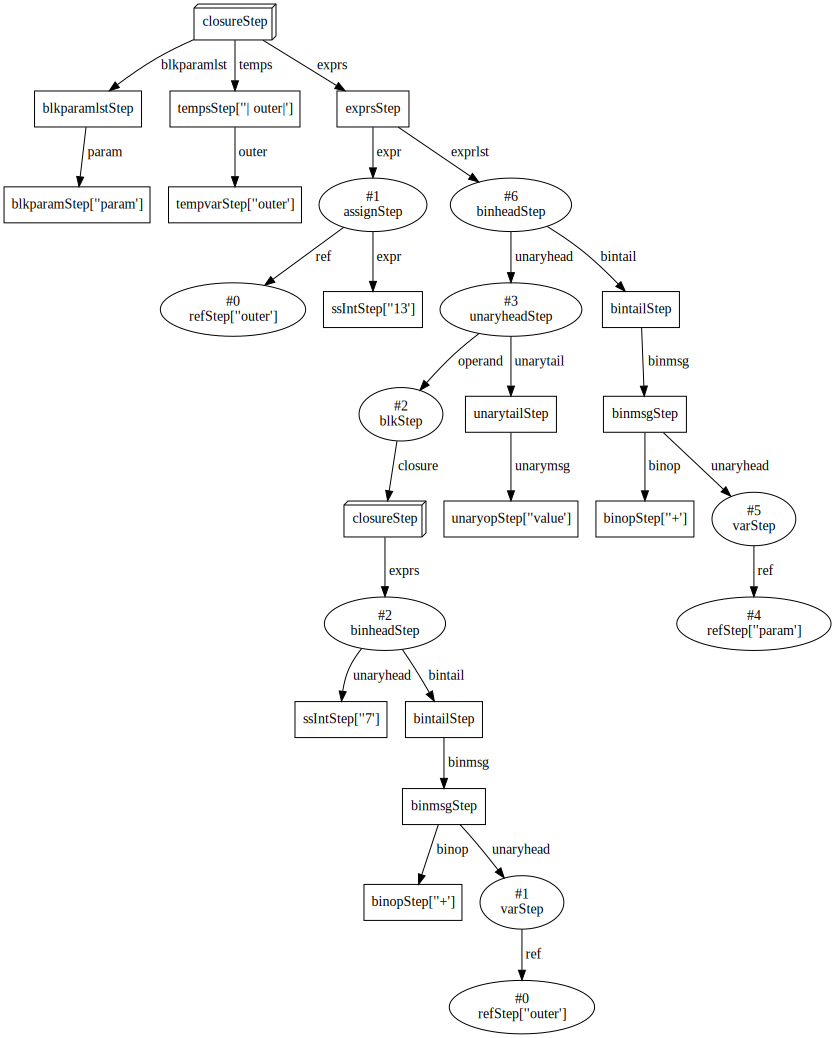

In [11]:
# ss = """abc := -123 + 1.2 + 1.0e-1 + 16r123"""

#
# Tested
#

# assignment & ExpressionList
# ss = "var1 := 1"
# ss = "var1 := root"
# ss = "var1 := 'abc'"
# ss = "var1 := root; var2 := var1"
# ss = "a := b := 2"
# ss = "var1 := root; var2 := _"

# unarySend & unaryTail
# ss = "obj1 attr3 name" 

# keywordSend
# ss = "obj1 name: 'abc'"
# ss = "obj1 method1__firstname: 'John' lastname: 'Doe'"
# ss = "obj1 attr1: 123; obj1 attr1"

# binarySend
# ss = "obj1 attr1: 1 + 2"
# ss = "obj1 attr1: 1 + 2 + obj1 var1"
# ss = "obj1 var1 + 1 + 2"
# ss = "obj1 var1 + obj1 var2"
# ss = "obj1 method3__var1: 3 + 4 var2: 2 + 3"

# cascade
# ss = "7 | + 3"
# ss = "2 | + 1; + 5" # Antlr ok, Amber fail
# ss = "obj1 var1 | +3"
# ss = "obj1 | method4 attr7 + 3" # Amber fail as it is mixed unaryMessage and binaryMessage
# ss = "obj1 | var1 + obj1 method4 attr7" # Amber fail as it is mixed unaryMessage and binaryMessage
# ss = "obj1 var2: 7 | var2  + 3" # ok
ss = "obj1 | method4 | method3__var1; 3 var2: 2 | + obj1 var1 | + 5" # ok

# subexpression
# ss = "(obj1 method4 method3__var1: 3 var2: 2) + obj1 var1 + 5"
# ss = "(obj := obj1) var1"
# ss = """(obj1 m1: 1) + (obj2 m2 m3) + 2"""

# primitive
# ss = f"<python: 'def hello:'>"

# BlockClosure
# ss = "[ :e | | a | a:= e + 1]" # error
# ss = "| tmp1 tmp2 | tmp1 := obj1 var1; tmp2 := tmp1 + 3; obj1 var2: tmp2 + 5; obj1 var2"
# ss = "| tmp1 tmp2 | obj1 var1"
# ss = "[2 + 3] value"
# ss = "[ :e | 2 + e] value: 9"
# ss = "b := [ :e | | a | a := e + 3]; b value: 9"
# ss = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]; b value: 9'

# literalArray
# ss = 'obj1 := $F'
# ss = "#('a' 12 $F true #root #(1 2) + root value: )"

# ss = "123"
# ss = "b := [ :e | 2 + e]; b value: 9"
# ss = 'b := [ :e | | a | a "comment" := [2 + 3] value + e]; b value: 9'
# ss = "| tmp1 tmp2 | obj1 var1"
# ss = "[2 + 3] value"
# ss = "#('a' 12 true #root #(1 2) + root value: )"
# ss = "obj1 var1 | + 3"
# ss = "123 toString"
# ss = "var1 := root"
# ss = "obj1 | method4 attr7 + 5"
# ss = "obj1 var1 | + 3"
# ss = "7; + 3 | +5"
# ss = "7 | + 3"
# ss = "[2 + 3] value"
# ss = "[:e | 2 + e] value: 13"
# ss = "2 + 3; 4 + 5"
# ss = "_ := b := 123"
# ss = "[:e | 2 + 3 + e]"

from smallscript.SObject import *
# rootContext.reset().loadPackage('smallscript')
from tests.TestBase import DebugClosure

# ss = "123"
ss = "b := [ :e | 2 + e]; b value: 9"
# ss = "obj1 | method4 | method3__var1; 3 var2: 2 | + obj1 var1 | + 5"

# ss = "obj1 | method4 | method3__var1"
# ss = "tobj | method14: 7 add: 3 | attr11 name | + tobj sobj11 attr11 + 2 + 4"
# ss = "[:param1 | param1]"
ss = ":param1 :param2| |a b| 123; a := 321; b := a"
ss = ":param1 :param2| |tmp1 tmp2| tmp1 := param2"
ss = ":param1 :param2| |tmp1 tmp2| 123"
ss = ":param1 :param2| |a b| param1"
ss = ":param1| | a | a := param1 + 13"
ss = "$F"
ss = "tobj attr11: (2 + 33)"
ss = "tobj | attr11: 7"
ss = "[:param1 | param1]"
ss = "tobj attr11: 'abc'"
ss = 'obj1 := 123; a := 321'
ss = "(a + (b + (c + 1)))"
ss = ":param | | outer| outer := 13; [7 + outer] value + param"

rootContext.getOrNewPackage('nbs').importSingleSObject(DebugClosure)
closure = DebugClosure()
# closure.toDebug(true_).loglevel(0)
closure.interpret(ss)
# closure.astGraph()
closure.irGraph()

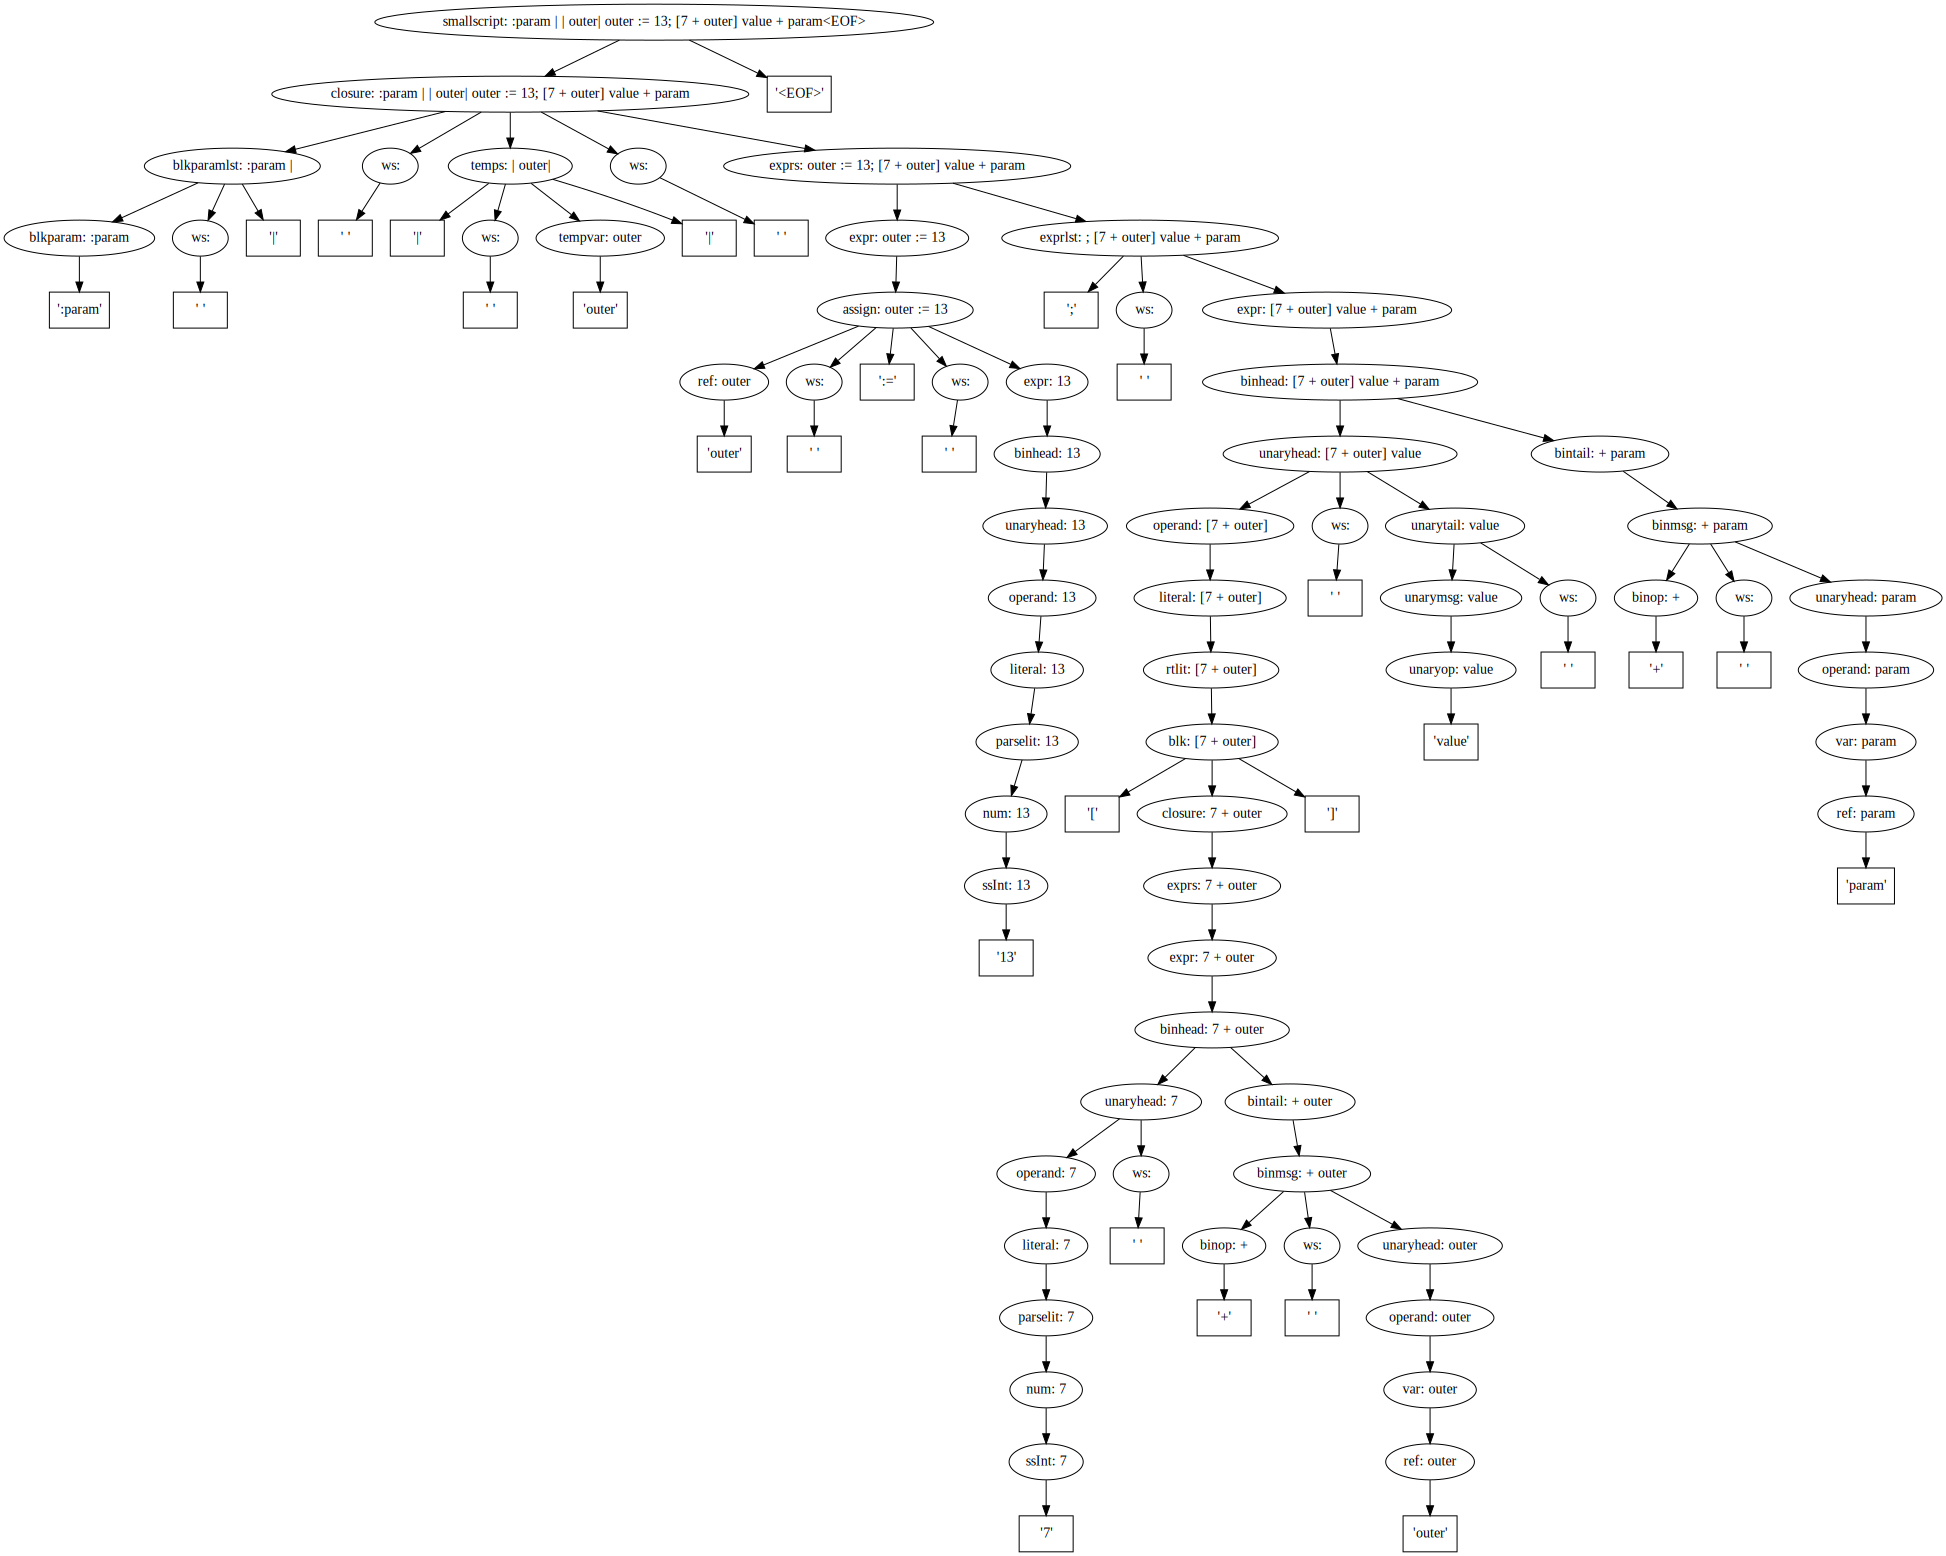

In [4]:
closure.astGraph()

### Clean up Loaded SmallScript and Tests classes

In [6]:
from tests.TestBase import DebugClosure
from smallscript.SObject import SObject
from smallscript.Closure import Closure

print(issubclass(Closure, SObject))
print(issubclass(DebugClosure, Closure))

True
True


In [7]:
ssmodules = [key for key in sys.modules.keys() if key.startswith('smallscript') or key.startswith('tests.TestBase')]
ssmodules.append('tests.TestBase')
for ss in ssmodules:
    if ss in sys.modules:
        print(ss)
        del sys.modules[ss]
# sys.modules.keys()

smallscript
smallscript.antlr
smallscript.antlr.SmallScriptLexer
smallscript.antlr.SmallScriptParser
smallscript.antlr.SmallScriptListener
smallscript.antlr.SmallScriptVisitor
smallscript.Step
smallscript.Closure
smallscript.SObject
tests.TestBase


In [8]:
%reset -f

In [9]:
import gc; gc.collect()

0

In [10]:
from tests.TestBase import DebugClosure
from smallscript.SObject import SObject
from smallscript.Closure import Closure
print(issubclass(Closure, SObject))
print(issubclass(DebugClosure, Closure))

True
True
